In [1]:
import torch
import matplotlib.pyplot as plt
import glob

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
!ls ../

data		 Figure6_InputPrep.py  Main_clean.py   __pycache__
Elman_SGD	 Figure6.py	       Main_local.py   README.html
environment.yml  Figure7.py	       Main.py	       README.md
Figure3.m	 figures	       Main_s4.py      RNN_Class.py
Figure4.py	 helper.py	       NeuralEvidence  test.sh
Figure4_run.sh	 IO_plot.py	       notebooks
Figure5.py	 Localization	       py2mat_exe.py


In [10]:
loaded = torch.load("../Elman_SGD/predloss/MNIST_68PC_SeqN10_Ns20.pth.tar")
print(loaded.keys())
X_mini = loaded["X_mini"]
Target_mini = loaded["Target_mini"]
print(f"X_mini shape: {X_mini.shape}")
print(f"Target_mini shape: {Target_mini.shape}")

dict_keys(['X_mini', 'Target_mini'])
X_mini shape: torch.Size([20, 10, 68])
Target_mini shape: torch.Size([20, 10, 68])


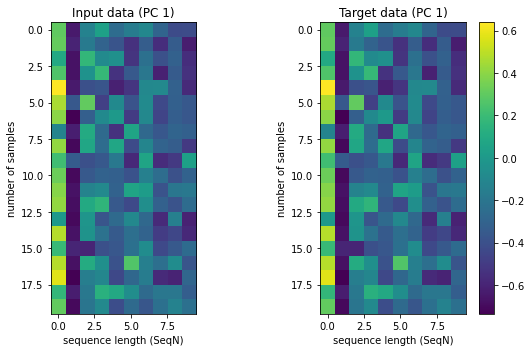

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

im = axes[0].imshow(X_mini[:, :, 0])
axes[0].set_title("Input data (PC 1)")

im = axes[1].imshow(Target_mini[:, :, 0])
axes[1].set_title("Target data (PC 1)")

for i in range(2):
    axes[i].set_xlabel("sequence length (SeqN)")
    axes[i].set_ylabel("number of samples")

plt.colorbar(im)

plt.tight_layout()
plt.show()

- Main_clean.py:    main script to train/test model
- --input: user definied input sequence

- .pth: PyTorch saved model states --> typically a dictionary

In [5]:
# get all possible inputs
inputs = glob.glob("./data/*SeqN100*")
inputs.remove("./data/InputNs50_SeqN100_StraightTraj_Marcus_v2.pth.tar")
inputs.remove("./data/Ns200_SeqN100_2Batch.pth.tar")
inputs.sort()
print(inputs)

['./data/Ns200_SeqN100_1.pth.tar', './data/Ns200_SeqN100_1_10per.pth.tar', './data/Ns200_SeqN100_1_20per.pth.tar', './data/Ns200_SeqN100_1_30per.pth.tar', './data/Ns200_SeqN100_1_40per.pth.tar', './data/Ns200_SeqN100_1_50per.pth.tar', './data/Ns200_SeqN100_1_5per.pth.tar', './data/Ns200_SeqN100_2.pth.tar']


In [6]:
def plot_input(fname):
    loaded = torch.load(fname)
    # keys: X_mini, Target_mini
    X_mini = loaded["X_mini"]  # input
    Target_mini = loaded["Target_mini"]  # output

    print(
        "Max value:",
        round(X_mini.max().item(), 3),
        "\tMin value:",
        round(X_mini.min().item(), 3),
    )
    plt.imshow(X_mini.reshape((100, 200)))
    plt.xlabel("Neuron")
    plt.ylabel("Time (a.u.)")
    plt.title(fname)
    plt.show()

See: Figure4.py for how the Gaussian input data was constructed.

./data/Ns200_SeqN100_1.pth.tar
Max value: 1.0 	Min value: 0.0


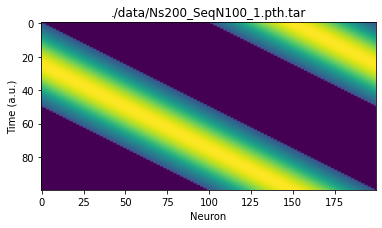

./data/Ns200_SeqN100_1_10per.pth.tar
Max value: 1.354 	Min value: 0.0


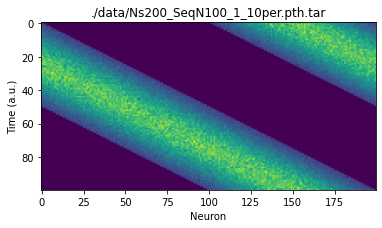

./data/Ns200_SeqN100_1_20per.pth.tar
Max value: 1.717 	Min value: 0.0


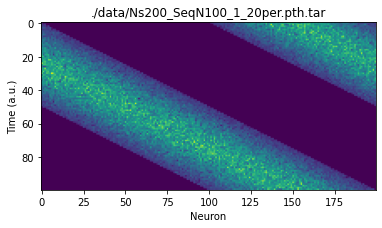

./data/Ns200_SeqN100_1_30per.pth.tar
Max value: 2.08 	Min value: -0.254


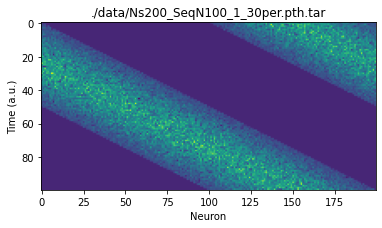

./data/Ns200_SeqN100_1_40per.pth.tar
Max value: 2.442 	Min value: -0.619


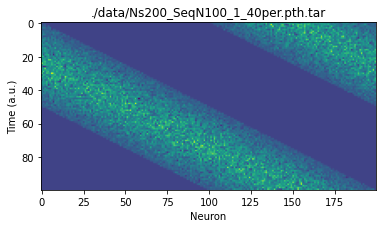

./data/Ns200_SeqN100_1_50per.pth.tar
Max value: 2.805 	Min value: -0.984


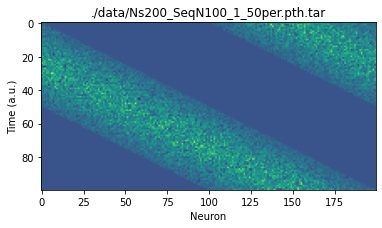

./data/Ns200_SeqN100_1_5per.pth.tar
Max value: 1.173 	Min value: 0.0


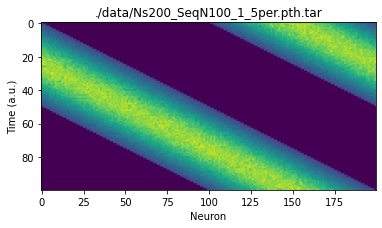

./data/Ns200_SeqN100_2.pth.tar
Max value: 1.0 	Min value: 0.0


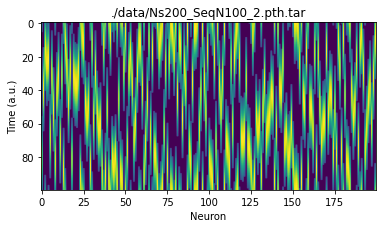

In [7]:
for i in inputs:
    print(i)
    plot_input(i)

BATCH: 1
Max values
	X_mini: 1.0
	Target_mini: 1.0
Min values
	X_mini: 0.0
	Target_mini: 0.0


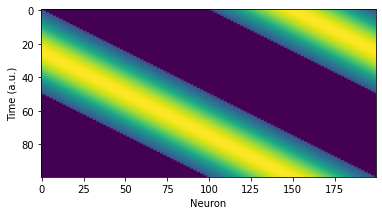

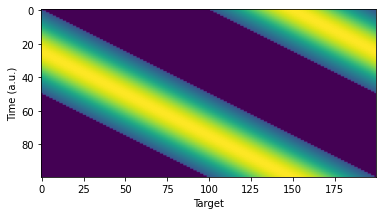


BATCH: 2
Max values
	X_mini: 1.0
	Target_mini: 1.0
Min values
	X_mini: 0.0
	Target_mini: 0.0


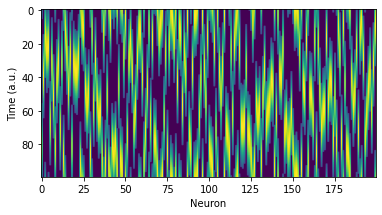

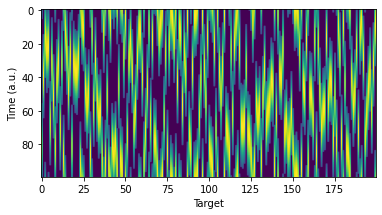

In [31]:
# Sombrero input
sombrero = torch.load(
    "./data/Ns200_SeqN100_2Batch.pth.tar"
)  # keys: X_mini, Target_mini
X_mini = sombrero["X_mini"]
Target_mini = sombrero["Target_mini"]
n_batches = X_mini.shape[0]

for i in range(n_batches):
    print(f"BATCH: {i+1}")
    print("Max values")
    print(f"\tX_mini: {round(X_mini[i, :, :].max().item(), 3)}")
    print(f"\tTarget_mini: {round(Target_mini[i, :, :].max().item(), 3)}")
    print("Min values")
    print(f"\tX_mini: {round(X_mini[i, :, :].min().item(), 3)}")
    print(f"\tTarget_mini: {round(Target_mini[i, :, :].min().item(), 3)}")
    plt.imshow(X_mini[i, :, :])
    plt.xlabel("Neuron")
    plt.ylabel("Time (a.u.)")
    plt.show()
    plt.imshow(Target_mini[i, :, :])
    plt.xlabel("Target")
    plt.ylabel("Time (a.u.)")
    plt.show()
    print()

In [11]:
X_mini.shape

torch.Size([2, 100, 200])

In [12]:
Target_mini.shape

torch.Size([2, 100, 200])

The 1D Mexican hat function (Ricker wavelet) is defined as:

$
\psi(x) = \left(1 - \frac{x^2}{\sigma^2}\right) \exp\left(-\frac{x^2}{2\sigma^2}\right)
$

where:
- $\psi$ is the Mexican hat function
- $x, y$ are spatial coordinates
- $\sigma$ is the scale (controls width of the peak and surrounding dip)

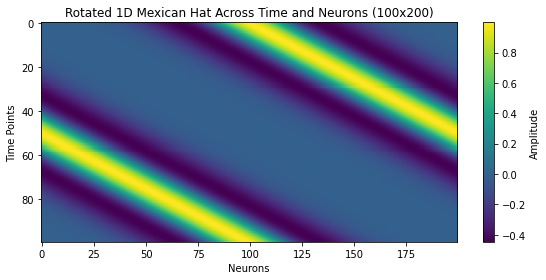

In [5]:
""" Mexican hat input """

import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # time points
N = 200  # neurons
sigma = 1.0

# Generate 1D Mexican hat (Ricker wavelet)
x = np.linspace(-5, 5, N)
mexican_hat_1d = (1 - (x**2 / sigma**2)) * np.exp(-(x**2) / (2 * sigma**2))

# Create a rotated version by shifting it diagonally across time
mexican_hat_rotated = np.zeros((T, N))
for t in range(T):
    shift = int((t / T) * N)  # left-to-right diagonal
    x_shifted = np.roll(mexican_hat_1d, shift)
    mexican_hat_rotated[t] = x_shifted

"""
# Shift downward (time) and leftward (neurons)
shift_time = -20  # -20  # shift rows down
shift_neuron = 0  # -20  # shift columns left
# Apply 2D roll
shifted_mexican_hat = np.roll(mexican_hat_rotated, shift=shift_time, axis=0)
shifted_mexican_hat = np.roll(shifted_mexican_hat, shift=shift_neuron, axis=1)
"""

# Plot
plt.figure(figsize=(8, 4))
plt.imshow(mexican_hat_rotated, cmap="viridis", aspect="auto")
plt.colorbar(label="Amplitude")
plt.title("Rotated 1D Mexican Hat Across Time and Neurons (100x200)")
plt.xlabel("Neurons")
plt.ylabel("Time Points")
plt.tight_layout()
plt.show()